<a href="https://colab.research.google.com/github/Daleth-Barreto/QuantumPatterns/blob/master/Quantum_Patterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Quantum Patterns Generator with Qiskit

This project uses quantum circuits to generate pixelated images by mapping qubit states to RGB color values. Leveraging Qiskit and Matplotlib, it visualizes quantum states as artistic patterns!

## Requirements

1. qiskit
2. qiskit-aer
3. matplotlib
4. numpy


In [ ]:
!pip install qiskit qiskit-aer pylatexenc

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.primitives import Sampler
from qiskit_aer import AerSimulator

import matplotlib
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister



##How do the circuits work?

In this project, each pixel is generated from the state of a 3-qubit quantum circuit. Let’s break it down

1. Qubits and Superposition:
      Qubits can exist in a superposition of states, meaning they can simultaneously be 0 and 1 with certain probabilities. When measured, they "collapse" to either 0 or 1.

2. Quantum Gates and Color Encoding:
      Quantum gates (like Hadamard or Pauli gates) manipulate qubit states, and their final measured state defines the color channels:
  * The first qubit controls the red value.
  * The second qubit controls the green value.
  * The third qubit controls the blue value.

3. Quantum Measurement:
      Each pixel is determined by running the circuit and measuring the qubits. The result is a binary string, which we convert to RGB values:
     * 000 → Black
     * 111 → White
     * 101 → Purple (red + blue)
     * And so on!

##Quantum Patterns:
By designing different circuits, we create unique visual patterns:

  * Circular Patterns: Based on distance from the center.
  * Waves: Using phase shifts to generate periodic color changes.
  * Checkerboard: Flipping qubits based on coordinates.

This approach beautifully blends quantum randomness with controlled design, showcasing quantum principles in a visually intuitive way!

Would you like me to help format this for your LinkedIn post or explain it in even more depth? Let me know! 🚀

In [ ]:
num_qubits = 3
width = 100
height = 100
num_px = width * height
hola=""

In [ ]:
#Create quantum and classical registers
qr = QuantumRegister(num_qubits, 'q')
cr = ClassicalRegister(num_qubits, 'c')

#Create a simulator instance
simulator = AerSimulator()

In [ ]:
def create_simple_pattern_circuite(qubits, x, y):
  qc = QuantumCircuit(qubits)
  # Apply rotations based on pixel coordinates to introduce correlation
  for i in range(num_qubits):
    qc.h(i)
    qc.ry(np.sin(x * i) + np.cos(y * i), i)  # Introduce correlation
  qc.measure_all(qr,cr)
  return qc

In [ ]:
def create_pattern_circuit(qubits, x, y, pattern_type):
    qc = QuantumCircuit(qubits)
    for i in range(num_qubits):
        qc.h(i)  # Hadamard gate for superposition

        if pattern_type == "circular":
            qc.ry(np.sin(np.sqrt(x**2 + y**2)) * i, i)
        elif pattern_type == "waves":
            qc.ry(np.sin(x + y) * i, i)
        elif pattern_type == "checkerboard":
            qc.ry((x + y) % 2 * np.pi/2, i)
        else:  # Default pattern with random rotations
            # Introduce random rotations for each qubit based on x, y
            random_rotation = random.uniform(0, 2 * np.pi)  # Random angle between 0 and 2π
            qc.ry(random_rotation, i)  # Apply random rotation to qubit 'i'
    qc.measure_all(qr,cr) # measure all in the quantum and classical registers.
    return qc

In [ ]:
def quantum_pattern_word(qubits, x, y):
  qc = QuantumCircuit(qubits)
  for i, char in enumerate(word):
    rotation_angle = ord(char) * np.pi / 180
    # Use modulo operator to wrap the qubit index
    qc.ry(rotation_angle, i % num_qubits)
  for i in range(num_qubits):
    qc.cry(x * i + y * (num_qubits - i), i, (i + 1) % num_qubits)
  qc.measure_all(qr,cr)
  return qc

In [ ]:
def generate_image(qubits, width, height, circuit_function, pattern_type=None):
       pixel_data = []
       for y in range(height):
           for x in range(width):
               if pattern_type:
                   qc = circuit_function(qubits, x, y, pattern_type)
               else:
                   qc = circuit_function(qubits, x, y)
               job = simulator.run(qc, shots=1)
               result = job.result()
               counts = result.get_counts()

               pixel_value = list(counts.keys())[0]
               pixel_value = pixel_value[::-1]

               r = int(pixel_value[0]) * 255
               g = int(pixel_value[1]) * 255
               b = int(pixel_value[2]) * 255

               pixel_data.append((r, g, b))
       image = np.array(pixel_data).reshape((height, width, 3))
       return image

##Print Our Different Patterns


The results are rendered as images using Matplotlib.

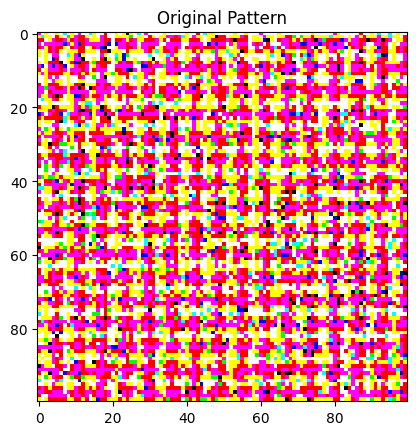

In [ ]:
# Generate the first image (original pattern)
image1 = generate_image(qr, width, height, create_simple_pattern_circuite)
plt.imshow(image1)
plt.title(f"Original Pattern")
plt.show()

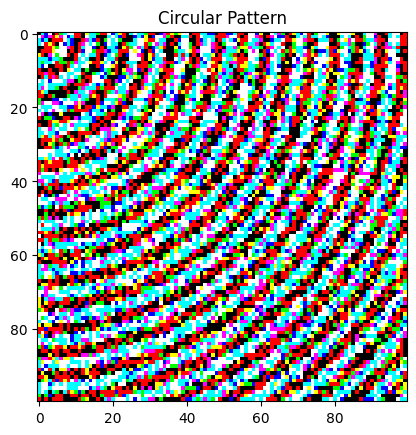

In [ ]:
# Generate the second image (circular pattern)
image2 = generate_image(qr, width, height, create_pattern_circuit, "circular")
plt.imshow(image2)
plt.title(f"Circular Pattern")
plt.show()

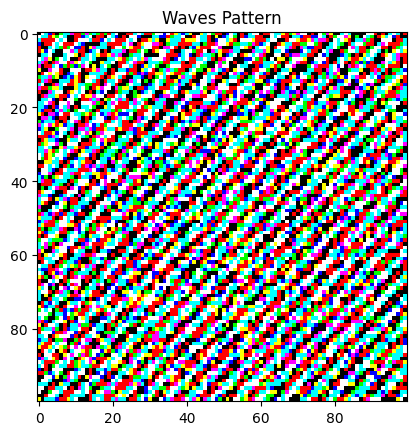

In [ ]:
# Generate waves pattern)
image2 = generate_image(qr, width, height, create_pattern_circuit, "waves")
plt.imshow(image2)
plt.title(f"Waves Pattern")
plt.show()

In [ ]:
width = 50
height = 50

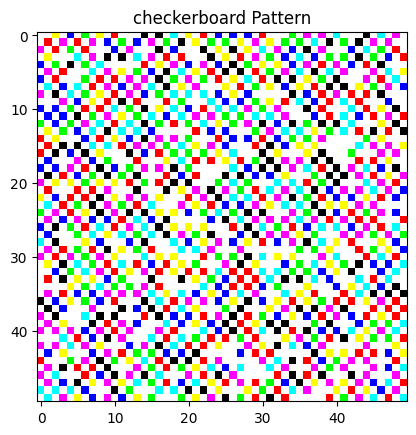

In [ ]:
# Generate the checkerboard pattern)
image2 = generate_image(qr, width, height, create_pattern_circuit, "checkerboard")
plt.imshow(image2)
plt.title(f"checkerboard Pattern")
plt.show()

In [ ]:
width = 70
height = 70

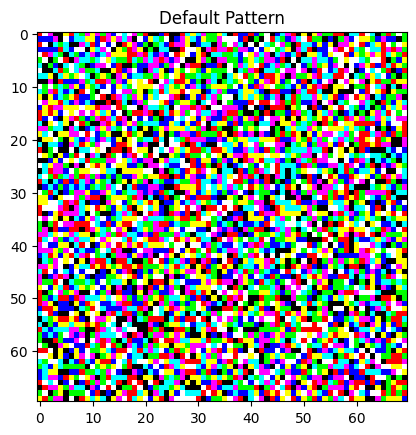

In [ ]:
# Generate the random pattern)
image2 = generate_image(qr, width, height, create_pattern_circuit, "random")
plt.imshow(image2)
plt.title(f"Default Pattern")
plt.show()

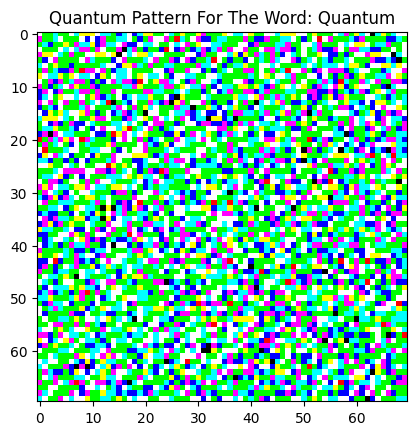

In [ ]:
word = "Quantum"
image_pattern = generate_image(qr, width, height, quantum_pattern_word)
plt.imshow(image_pattern)
plt.title(f"Quantum Pattern For The Word: {word}")
plt.show()

##Circuits

You can print and visualize the circuits themselves!

In [ ]:
qc_pixel = create_simple_pattern_circuite(qr, 50, 50)
qc_pattern_circular = create_pattern_circuit(qr, 50, 50, "circular")
qc_pattern_waves = create_pattern_circuit(qr, 50, 50, "waves")
qc_pattern_checkerboard = create_pattern_circuit(qr, 50, 50, "checkerboard")
qc_pattern_default = create_pattern_circuit(qr, 50, 50, "other")
qc_word = quantum_pattern_word(qr, 50, 50)



### Print the circuits as ASCII (for terminal or logs)

In [ ]:
print("Circuit: create_simple_pattern_circuite")
print(qc_pixel.draw())




Circuit: create_simple_pattern_circuite
        ┌───┐   ┌───────┐    ░ ┌─┐      
   q_0: ┤ H ├───┤ Ry(1) ├────░─┤M├──────
        ├───┤┌──┴───────┴──┐ ░ └╥┘┌─┐   
   q_1: ┤ H ├┤ Ry(0.70259) ├─░──╫─┤M├───
        ├───┤├─────────────┤ ░  ║ └╥┘┌─┐
   q_2: ┤ H ├┤ Ry(0.35595) ├─░──╫──╫─┤M├
        └───┘└─────────────┘ ░  ║  ║ └╥┘
meas: 3/════════════════════════╩══╩══╩═
                                0  1  2 


In [ ]:
print("Circuit: create_pattern_circuit (circular)")
print(qc_pattern_circular.draw())

Circuit: create_pattern_circuit (circular)
        ┌───┐   ┌───────┐    ░ ┌─┐      
   q_0: ┤ H ├───┤ Ry(0) ├────░─┤M├──────
        ├───┤┌──┴───────┴──┐ ░ └╥┘┌─┐   
   q_1: ┤ H ├┤ Ry(0.99969) ├─░──╫─┤M├───
        ├───┤└┬────────────┤ ░  ║ └╥┘┌─┐
   q_2: ┤ H ├─┤ Ry(1.9994) ├─░──╫──╫─┤M├
        └───┘ └────────────┘ ░  ║  ║ └╥┘
meas: 3/════════════════════════╩══╩══╩═
                                0  1  2 


In [ ]:
print("Circuit: create_pattern_circuit (waves)")
print(qc_pattern_waves.draw())


Circuit: create_pattern_circuit (waves)
        ┌───┐   ┌───────┐     ░ ┌─┐      
   q_0: ┤ H ├───┤ Ry(0) ├─────░─┤M├──────
        ├───┤┌──┴───────┴───┐ ░ └╥┘┌─┐   
   q_1: ┤ H ├┤ Ry(-0.50637) ├─░──╫─┤M├───
        ├───┤├─────────────┬┘ ░  ║ └╥┘┌─┐
   q_2: ┤ H ├┤ Ry(-1.0127) ├──░──╫──╫─┤M├
        └───┘└─────────────┘  ░  ║  ║ └╥┘
meas: 3/═════════════════════════╩══╩══╩═
                                 0  1  2 


In [ ]:
print("Circuit: create_pattern_circuit (checkerboard)")
print(qc_pattern_checkerboard.draw())


Circuit: create_pattern_circuit (checkerboard)
        ┌───┐┌───────┐ ░ ┌─┐      
   q_0: ┤ H ├┤ Ry(0) ├─░─┤M├──────
        ├───┤├───────┤ ░ └╥┘┌─┐   
   q_1: ┤ H ├┤ Ry(0) ├─░──╫─┤M├───
        ├───┤├───────┤ ░  ║ └╥┘┌─┐
   q_2: ┤ H ├┤ Ry(0) ├─░──╫──╫─┤M├
        └───┘└───────┘ ░  ║  ║ └╥┘
meas: 3/══════════════════╩══╩══╩═
                          0  1  2 


In [ ]:
print("Circuit: create_pattern_circuit (default)")
print(qc_pattern_default.draw())

Circuit: create_pattern_circuit (default)
        ┌───┐┌────────────┐ ░ ┌─┐      
   q_0: ┤ H ├┤ Ry(3.1743) ├─░─┤M├──────
        ├───┤├───────────┬┘ ░ └╥┘┌─┐   
   q_1: ┤ H ├┤ Ry(1.661) ├──░──╫─┤M├───
        ├───┤├───────────┴┐ ░  ║ └╥┘┌─┐
   q_2: ┤ H ├┤ Ry(5.7764) ├─░──╫──╫─┤M├
        └───┘└────────────┘ ░  ║  ║ └╥┘
meas: 3/═══════════════════════╩══╩══╩═
                               0  1  2 


In [ ]:
print("Circuit: quantum_pattern_word")
print(qc_word.draw())

Circuit: quantum_pattern_word
        ┌────────────┐┌────────────┐┌────────────┐                      »
   q_0: ┤ Ry(1.4137) ├┤ Ry(1.9199) ├┤ Ry(1.9024) ├─────■────────────────»
        ├───────────┬┘├────────────┤└────────────┘┌────┴────┐           »
   q_1: ┤ Ry(2.042) ├─┤ Ry(2.0246) ├──────────────┤ Ry(150) ├─────■─────»
        ├───────────┤ ├───────────┬┘              └─────────┘┌────┴────┐»
   q_2: ┤ Ry(1.693) ├─┤ Ry(2.042) ├──────────────────────────┤ Ry(150) ├»
        └───────────┘ └───────────┘                          └─────────┘»
meas: 3/════════════════════════════════════════════════════════════════»
                                                                        »
«        ┌─────────┐ ░ ┌─┐      
«   q_0: ┤ Ry(150) ├─░─┤M├──────
«        └────┬────┘ ░ └╥┘┌─┐   
«   q_1: ─────┼──────░──╫─┤M├───
«             │      ░  ║ └╥┘┌─┐
«   q_2: ─────■──────░──╫──╫─┤M├
«                    ░  ║  ║ └╥┘
«meas: 3/═══════════════╩══╩══╩═
«                       0  1  2 


## 🙌 Thank You for Visiting My Project!

I truly appreciate you taking the time to explore my quantum computing visualization project. I hope you found it interesting and that it sparked some curiosity about the power of quantum circuits and their creative potential!

If you have any questions, suggestions, or feedback, feel free to reach out — I’d love to hear from you!  

### 📩 **Contact Me:**  
- **LinkedIn:** [Alan Daleth Hernandez Barreto](www.linkedin.com/in/dalethhernandez)  
- **GitHub:** [GitHub Repository](https://github.com/Daleth-Barreto/QuantumPatterns/)  
- **Email:** alandaleth.hb@gmail.com  

Let’s keep learning and building amazing things together! 🚀  
